<a href="https://colab.research.google.com/github/arexdevson/Projeto_LIbrary/blob/main/Estimativa_de_vendas_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#responder a pergunta - "Vamos investir 75k em mkt, qual deve ser o estoque para loja?"

#bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [8]:
#importando base de vendas
base = pd.read_excel("/content/Investimento_x_Venda.xlsx")

#exibindo as 5 primeiras linhas
print(base.head())



   Investimento em marketing  Venda Qtd
0                         20        118
1                         25        142
2                         40        225
3                         52        260
4                         67        295


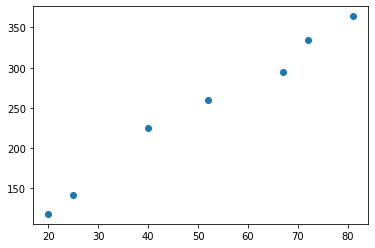

In [9]:
#visualizando as informações
plt.scatter(base["Investimento em marketing"],base["Venda Qtd"])
plt.show()



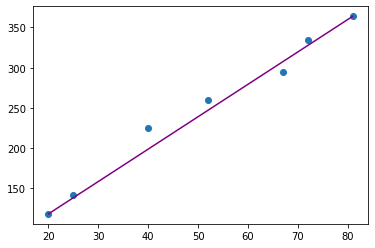

In [12]:
#os dados são lineares e uma das formas de verificamos uma possivel relação entre os dados é conectando o ponto que eu quero descobrir a partir de uma linha reta, que cruza os dados
#fazendo isso então ligando o primeiro ponto ao ultimo ponto da expressão linear
plt.scatter(base["Investimento em marketing"],base["Venda Qtd"])
x0 = base["Investimento em marketing"][0]
y0 = base["Venda Qtd"][0]
x6 = base["Investimento em marketing"][6]
y6 = base["Venda Qtd"][6]
plt.plot([x0,x6],[y0,y6],"purple")
plt.show()



In [21]:
#machine learning pra descobrir melhor o valor linear

from sklearn import linear_model
#chamando a função
reg = linear_model.LinearRegression()

#fitando/encaixando os dados
#porém os dados se eu colocar eles assim
#reg.fit(base["Investimento em marketing"],base["Vendas Qtd"]), da um erro por conta dos dados não estarem em uma matriz
#reg.fit(base["Investimento em marketing"].reshape(-1,1),base["Vendas Qtd"]), os dados estão em uma matriz mas possuem valores e indices
#.. é meio que o python perguntando se ele deve usar o index ou os valores da coluna (.indexes para index / .values para valores)

#o correto então seria....
reg.fit(base["Investimento em marketing"].values.reshape(-1,1),base["Venda Qtd"])

#coeficiente da reta
coeficiente = reg.coef_
print(reg.coef_)

#onde a reta intercepta
intercepta_reta = reg.intercept_
print(reg.intercept_)



[3.90643623]
49.200323514387804


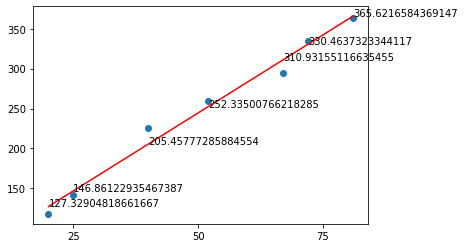

In [30]:
#plotando a nova reta (melhor reta considerando os possiveis erros lineares (noção que não temos dado a primeira reta plotada que só cruzava uma ponta aoutra)
#coeficiente = a
#intercepta_reta = b

plt.scatter(base["Investimento em marketing"],base["Venda Qtd"])
x = np.array(base["Investimento em marketing"])
y =  coeficiente*x+intercepta_reta
plt.xticks([25,50,75,100])
plt.yticks([50,100,150,200,250,300,350])
plt.plot(x,y,"r")
for ax,ay in zip(x, y):
    plt.text(ax, ay, str(ay))
plt.show()



[342.18304104]


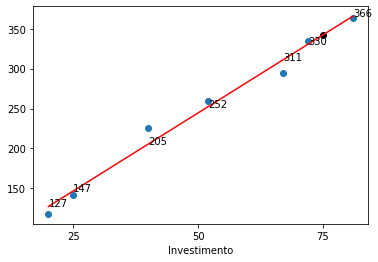

In [31]:
#preditando os 75k que solicitaram
preditor = reg.predict([[75]])

print(preditor)

#representando o ponto identificado
plt.scatter(base["Investimento em marketing"],base["Venda Qtd"])
plt.scatter(75,preditor,color="k")

#porque usamos np.array? pq nosso algoritmo nos traz dados de predição em uma array (coluna e linha) * outro motivo por fazermos uma lista de uma lista (duas dimensões - linha e coluna)

x = np.array(base["Investimento em marketing"])
y2 =  coeficiente*x+intercepta_reta
plt.xticks([25,50,75,100])
plt.yticks([50,100,150,200,250,300,350])
plt.plot(x,y2,"r")
for ax,ay in zip(x, y2):
    plt.text(ax, ay, str(f"{ay:.0f}"))
plt.xlabel('Investimento')
plt.show()

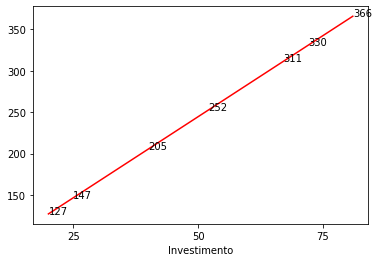

In [32]:

#porque usamos np.array? pq nosso algoritmo nos traz dados de predição em uma array (coluna e linha) * outro motivo por fazermos uma lista de uma lista (duas dimensões - linha e coluna)

x = np.array(base["Investimento em marketing"])
y2 =  coeficiente*x+intercepta_reta
plt.xticks([25,50,75,100])
plt.yticks([50,100,150,200,250,300,350])
plt.plot(x,y2,"r")
for ax,ay in zip(x, y2):
    plt.text(ax, ay, str(f"{ay:.0f}"))
plt.xlabel('Investimento')
plt.show()